In [2]:
#import modules and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import seaborn as sns
import sklearn

In [20]:
data= pd.read_csv("D:\Stock forecasting\GOOG.csv")

In [14]:
data.shape

(1257, 14)

In [15]:
data.isnull().sum()

symbol         0
Date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   Date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   int64  
 13  splitFactor  1257 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 137.6+ KB


In [17]:
data.head()

,symbol,Date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0,1
1,GOOG,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0,1
2,GOOG,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0,1
3,GOOG,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0,1
4,GOOG,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0,1


In [21]:
data['data']= pd.to_datetime(data['date'])

In [22]:
dates=[]
for i in range(len(data)):
    dates.append(data['date'].iloc[i][0:10]) 

In [23]:
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,data
0,GOOG,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0,1,2016-02-16 00:00:00+00:00
1,GOOG,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0,1,2016-02-17 00:00:00+00:00
2,GOOG,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0,1,2016-02-18 00:00:00+00:00
3,GOOG,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0,1,2016-02-19 00:00:00+00:00
4,GOOG,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0,1,2016-02-22 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,GOOG,2021-02-04 00:00:00+00:00,2062.37,2078.5500,2042.59,2068.89,1852329,2062.37,2078.5500,2042.59,2068.89,1852329,0,1,2021-02-04 00:00:00+00:00
1253,GOOG,2021-02-05 00:00:00+00:00,2098.00,2102.5100,2059.33,2070.00,1535135,2098.00,2102.5100,2059.33,2070.00,1535135,0,1,2021-02-05 00:00:00+00:00
1254,GOOG,2021-02-08 00:00:00+00:00,2092.91,2123.5469,2072.00,2105.91,1242411,2092.91,2123.5469,2072.00,2105.91,1242411,0,1,2021-02-08 00:00:00+00:00
1255,GOOG,2021-02-09 00:00:00+00:00,2083.51,2105.1300,2078.54,2078.54,886247,2083.51,2105.1300,2078.54,2078.54,886247,0,1,2021-02-09 00:00:00+00:00


In [24]:
data.drop(['symbol'], axis= 1, inplace= True)

In [25]:
data['date']= pd.to_datetime(dates)

In [26]:
# checking duplicated time stamps
data['date'].duplicated().sum()

0

In [27]:
# looking for missing time stamps and filling them using interpolation
r = pd.date_range(start=data.date.min(), end=data.date.max())
data= data.set_index('date').reindex(r).fillna(np.nan).rename_axis('date').reset_index()

In [28]:
data.head(10)

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,data
0,2016-02-16,691.00,698.0000,685.050,692.98,2520021.0,691.00,698.0000,685.050,692.98,2520021.0,0.0,1.0,2016-02-16 00:00:00+00:00
1,2016-02-17,708.40,709.7500,691.380,699.00,2492634.0,708.40,709.7500,691.380,699.00,2492634.0,0.0,1.0,2016-02-17 00:00:00+00:00
2,2016-02-18,697.35,712.3500,696.030,710.00,1883248.0,697.35,712.3500,696.030,710.00,1883248.0,0.0,1.0,2016-02-18 00:00:00+00:00
3,2016-02-19,700.91,703.0805,694.050,695.03,1589281.0,700.91,703.0805,694.050,695.03,1589281.0,0.0,1.0,2016-02-19 00:00:00+00:00
4,2016-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,2016-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6,2016-02-22,706.46,713.2400,702.510,707.45,1949816.0,706.46,713.2400,702.510,707.45,1949816.0,0.0,1.0,2016-02-22 00:00:00+00:00
7,2016-02-23,695.85,708.4000,693.580,701.45,2009280.0,695.85,708.4000,693.580,701.45,2009280.0,0.0,1.0,2016-02-23 00:00:00+00:00
8,2016-02-24,699.56,700.0000,680.780,688.92,1963573.0,699.56,700.0000,680.780,688.92,1963573.0,0.0,1.0,2016-02-24 00:00:00+00:00
9,2016-02-25,705.75,705.9800,690.585,700.01,1642166.0,705.75,705.9800,690.585,700.01,1642166.0,0.0,1.0,2016-02-25 00:00:00+00:00


In [29]:
data.drop(['date', 'data'], axis=1, inplace= True)
cl_names= list(data.columns)

In [30]:
cl_names

['close',
 'high',
 'low',
 'open',
 'volume',
 'adjClose',
 'adjHigh',
 'adjLow',
 'adjOpen',
 'adjVolume',
 'divCash',
 'splitFactor']

In [31]:
#Interpolating the NAN values
for i in cl_names:
    data[i]= data[i].interpolate()

In [32]:
data.head(10)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,691.00,698.0000,685.050,692.98,2.520021e+06,691.00,698.0000,685.050,692.98,2.520021e+06,0.0,1.0
1,708.40,709.7500,691.380,699.00,2.492634e+06,708.40,709.7500,691.380,699.00,2.492634e+06,0.0,1.0
2,697.35,712.3500,696.030,710.00,1.883248e+06,697.35,712.3500,696.030,710.00,1.883248e+06,0.0,1.0
3,700.91,703.0805,694.050,695.03,1.589281e+06,700.91,703.0805,694.050,695.03,1.589281e+06,0.0,1.0
4,702.76,706.4670,696.870,699.17,1.709459e+06,702.76,706.4670,696.870,699.17,1.709459e+06,0.0,1.0
5,704.61,709.8535,699.690,703.31,1.829638e+06,704.61,709.8535,699.690,703.31,1.829638e+06,0.0,1.0
6,706.46,713.2400,702.510,707.45,1.949816e+06,706.46,713.2400,702.510,707.45,1.949816e+06,0.0,1.0
7,695.85,708.4000,693.580,701.45,2.009280e+06,695.85,708.4000,693.580,701.45,2.009280e+06,0.0,1.0
8,699.56,700.0000,680.780,688.92,1.963573e+06,699.56,700.0000,680.780,688.92,1.963573e+06,0.0,1.0
9,705.75,705.9800,690.585,700.01,1.642166e+06,705.75,705.9800,690.585,700.01,1.642166e+06,0.0,1.0


<AxesSubplot:>

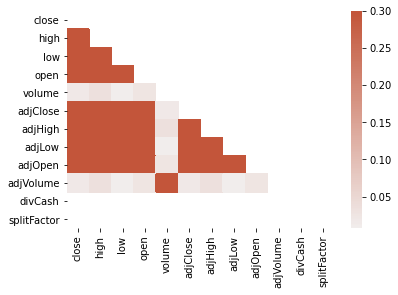

In [33]:
# correlation
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0)

In [34]:
# stationary check
from statsmodels.tsa.stattools import adfuller
series1= data['open']
result = adfuller(series1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 
print('**********************')
series2= data['close']
result = adfuller(series2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.872137
p-value: 0.992716
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
**********************
ADF Statistic: 0.819341
p-value: 0.991942
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Text(0.5, 0, 'open')

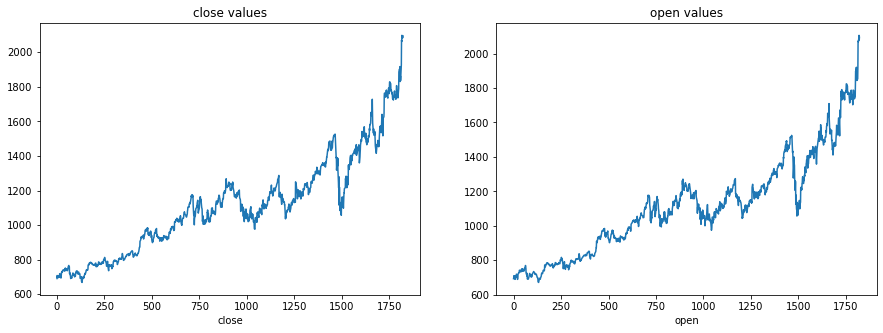

In [35]:
#Data visualization
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(data['close']) 
plt.title('close values')
plt.xlabel('close')
plt.subplot(1,2,2)
plt.plot(data['open'])
plt.title('open values')
plt.xlabel('open')

In [36]:
# train-test split
train = data.iloc[0:int(0.8*len(data)), :]
test= data.iloc[int(0.8*len(data)):, :]

In [37]:
test.shape

(365, 12)

In [38]:
test

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1457,1518.270000,1520.6900,1508.110000,1514.48,1.167565e+06,1518.270000,1520.6900,1508.110000,1514.48,1.167565e+06,0.0,1.0
1458,1514.660000,1527.1800,1504.600000,1512.69,9.297300e+05,1514.660000,1527.1800,1504.600000,1512.69,9.297300e+05,0.0,1.0
1459,1520.740000,1520.7400,1507.340000,1515.60,1.197836e+06,1520.740000,1520.7400,1507.340000,1515.60,1.197836e+06,0.0,1.0
1460,1520.472500,1523.4625,1508.652500,1515.45,1.178662e+06,1520.472500,1523.4625,1508.652500,1515.45,1.178662e+06,0.0,1.0
1461,1520.205000,1526.1850,1509.965000,1515.30,1.159488e+06,1520.205000,1526.1850,1509.965000,1515.30,1.159488e+06,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,2096.303333,2109.5223,2063.553333,2081.97,1.437560e+06,2096.303333,2109.5223,2063.553333,2081.97,1.437560e+06,0.0,1.0
1818,2094.606667,2116.5346,2067.776667,2093.94,1.339986e+06,2094.606667,2116.5346,2067.776667,2093.94,1.339986e+06,0.0,1.0
1819,2092.910000,2123.5469,2072.000000,2105.91,1.242411e+06,2092.910000,2123.5469,2072.000000,2105.91,1.242411e+06,0.0,1.0
1820,2083.510000,2105.1300,2078.540000,2078.54,8.862470e+05,2083.510000,2105.1300,2078.540000,2078.54,8.862470e+05,0.0,1.0


In [39]:
# Droping the constant values as they will be trouble some for Var modeling 
train.drop(['divCash', 'splitFactor'], axis=1, inplace= True)
test.drop(['divCash', 'splitFactor'], axis=1, inplace= True)

In [40]:
# model definition and training
def VarForecasting(Actual):
        model = VAR(Actual)
        model_fit = model.fit()
        prediction = model_fit.forecast(model_fit.y, steps=10) # predicting all the next 10 values at each step
        return np.array(prediction)

In [41]:
data.drop(['divCash', 'splitFactor'], axis=1, inplace= True)

In [42]:
close_predictions=[]
open_predictions=[]
for timepoint in range(0, len(test)):
    Actual_train = data.iloc[timepoint:timepoint + len(train)]
    Prediction = VarForecasting(Actual_train)
    close_predictions.append(Prediction[:,0])
    open_predictions.append(Prediction[:,3])

In [43]:
close_predictions[0]

array([1511.37251446, 1512.57080315, 1513.25678039, 1513.74003838,
       1514.1364764 , 1514.49222639, 1514.82704639, 1515.15014229,
       1515.46619735, 1515.77779469])

In [44]:
np.array(close_predictions).shape

(365, 10)

In [45]:
test.shape

(365, 10)

In [46]:
# prediction, visulalization and evaluation
p_close= [close_predictions[i][0] for i in range(len(close_predictions))]
p_open= [open_predictions[i][0] for i in range(len(open_predictions))]

Text(0.5, 0, 'open')

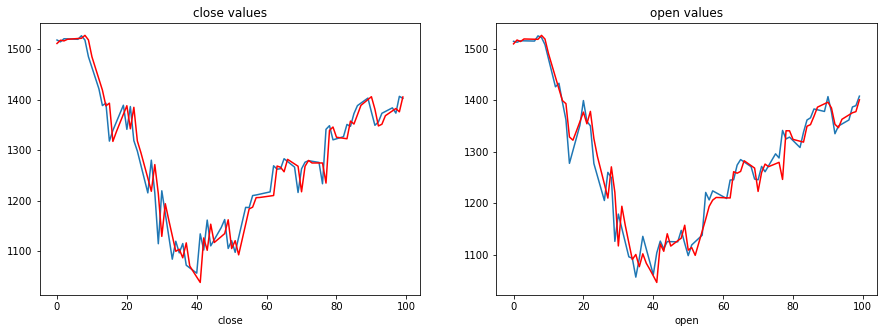

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.array(test['close'])[0:100])
plt.plot(p_close[0:100],'r')
plt.title('close values')
plt.xlabel('close')
plt.subplot(1,2,2)
plt.plot(np.array(test['open'])[0:100])
plt.plot(p_open[0:100], 'r' )
plt.title('open values')
plt.xlabel('open')

In [48]:
from sklearn.metrics import mean_squared_error
import math 
print(math.sqrt(mean_squared_error(np.array(test['open']),p_open )))
print(math.sqrt(mean_squared_error(np.array(test['close']),p_close )))

20.206816308695885
26.488846841844666
